In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import healpy as hp
import curvedsky as cs
sys.path.append('../')

In [2]:
%load_ext autoreload
%autoreload 2
from simulation import SimExperimentFG
from filtering import Filtering
from quest import Reconstruction

### SIMULATION

In [3]:
sim = SimExperimentFG.from_ini('../LB_FG0_toshiya.ini')

/project/projectdirs/litebird/simulations/maps/lensing_project_paper/S4BIRD/CMB_Lensed_Maps/CMB/
database from pickle
using /project/projectdirs/litebird/simulations/maps/lensing_project_paper/S4BIRD/CMB_Lensed_Maps/CMB/ and /global/cscratch1/sd/lonappan/S4BIRD/FG saving to /project/projectdirs/litebird/simulations/maps/lensing_project_paper/DELL/noFG


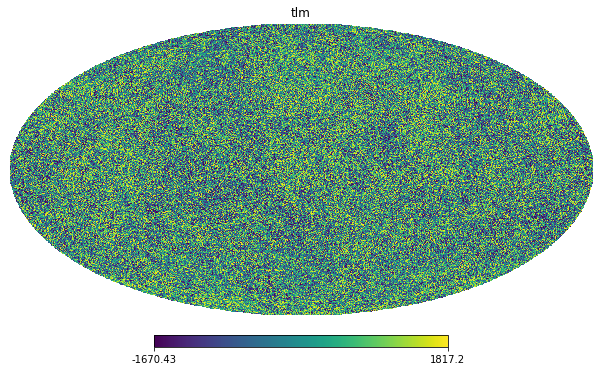

In [12]:
tlm = sim.get_cleaned_cmb(0)[0]
hp.mollview(hp.alm2map(tlm,sim.dnside),title='tlm',norm='hist')

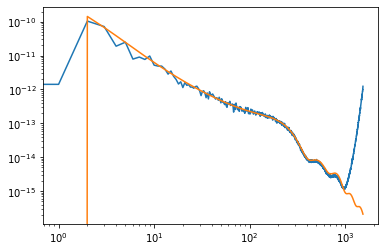

In [16]:
plt.loglog(hp.alm2cl(tlm)/sim.Tcmb**2)
plt.loglog(sim.cl_len[0,:])

In [18]:
nt,ne,nb = sim.noise_spectra(500)

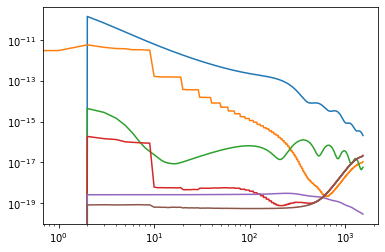

In [19]:
plt.loglog(sim.cl_len[0,:])
plt.loglog(nt)
plt.loglog(sim.cl_len[1,:])
plt.loglog(ne)
plt.loglog(sim.cl_len[2,:])
plt.loglog(nb)

### FILTERING

In [25]:
filt = Filtering.from_ini('../LB_FG0_toshiya.ini')

/project/projectdirs/litebird/simulations/maps/lensing_project_paper/S4BIRD/CMB_Lensed_Maps/CMB/
using /project/projectdirs/litebird/simulations/maps/lensing_project_paper/S4BIRD/CMB_Lensed_Maps/CMB/ and /global/cscratch1/sd/lonappan/S4BIRD/FG saving to /project/projectdirs/litebird/simulations/maps/lensing_project_paper/DELL/noFG


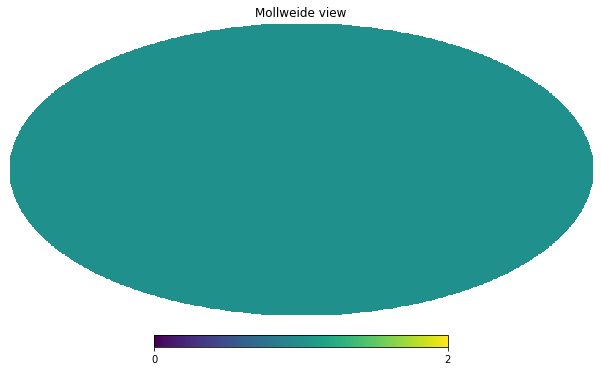

In [26]:
hp.mollview(filt.mask)

In [27]:
filt.fsky

1.0

/tmp/ipykernel_22125/488374186.py:3: RuntimeWarning: divide by zero encountered in true_divide
  plt.loglog(1/filt.cl_len[2,:])


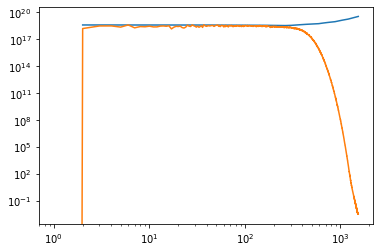

In [28]:
E,B = filt.cinv_EB(0)
clb = cs.utils.alm2cl(filt.lmax,B)
plt.loglog(1/filt.cl_len[2,:])
plt.loglog(clb)

### RECONSTRUCTION

In [29]:
rec = Reconstruction.from_ini('../LB_FG0_toshiya.ini')

/project/projectdirs/litebird/simulations/maps/lensing_project_paper/S4BIRD/CMB_Lensed_Maps/CMB/
using /project/projectdirs/litebird/simulations/maps/lensing_project_paper/S4BIRD/CMB_Lensed_Maps/CMB/ and /global/cscratch1/sd/lonappan/S4BIRD/FG saving to /project/projectdirs/litebird/simulations/maps/lensing_project_paper/DELL/noFG


100


/tmp/ipykernel_22125/2089321912.py:2: RuntimeWarning: invalid value encountered in true_divide
  plt.loglog(rec.MCN0()/rec.response_mean()**2 *rec.Lfac)
/tmp/ipykernel_22125/2089321912.py:3: RuntimeWarning: invalid value encountered in true_divide
  plt.loglog(rec.mean_field_cl()/rec.response_mean()**2 *rec.Lfac)
/tmp/ipykernel_22125/2089321912.py:4: RuntimeWarning: invalid value encountered in true_divide
  plt.loglog(rec.N1/rec.response_mean()**2 *rec.Lfac)


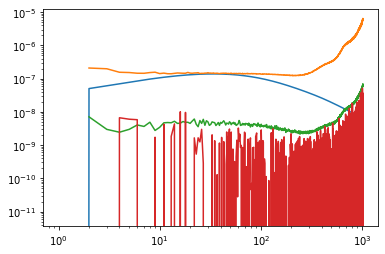

In [34]:
plt.loglog(rec.cl_pp*rec.Lfac)
plt.loglog(rec.MCN0()/rec.response_mean()**2 *rec.Lfac)
plt.loglog(rec.mean_field_cl()/rec.response_mean()**2 *rec.Lfac)
plt.loglog(rec.N1/rec.response_mean()**2 *rec.Lfac)

In [36]:
rec.SNR_phi()

43.355781701521174

/global/u2/l/lonappan/workspace/LBlens/Notebooks/../quest.py:243: RuntimeWarning: invalid value encountered in true_divide
  fl = self.cl_pp/(self.cl_pp+ nhl )


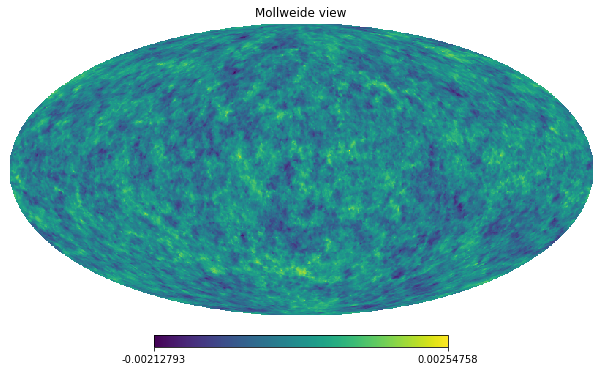

In [37]:
hp.mollview(rec.deflection_map(0))

In [38]:
stat = rec.get_qcl_wR_stat(100)

qcl stat:   0%|          | 0/100 [00:00<?, ?simulation/s]/global/u2/l/lonappan/workspace/LBlens/Notebooks/../quest.py:395: RuntimeWarning: invalid value encountered in true_divide
  return self.get_qcl(idx,n1)/self.response_mean()**2
qcl stat: 100%|██████████| 100/100 [00:29<00:00,  3.35simulation/s]


<ErrorbarContainer object of 3 artists>

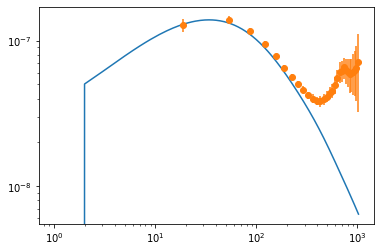

In [40]:
plt.loglog(rec.cl_pp*rec.Lfac)
plt.errorbar(rec.B,stat.mean(axis=0),stat.std(axis=0),fmt='o')